In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import math
from utils.manifold_metrics import *


In [2]:
path_1 = '../../figures-revision-1/manifold-SRD-long-formal--3-40/nsyb-G7f-rAch1h/within_cluster_distance'
path_2 = '../../figures-revision-1/manifold-SRD-long-formal--3-40/nsyb-G7f-r5HT1.0/within_cluster_distance'
result_path = '../../figures-revision-1/manifold-SRD-long-formal--3-40/within_cluster_distance'
filename = 'within_cluster_distance_test-whole.npy'
if_save = True
if_compare_odor = False
if_paired_test = True
if_p_corr = True
figure_save_path = result_path + '/' + 'figures-compare-channel/test'
folder = os.path.exists(figure_save_path)
if not folder:
    os.makedirs(figure_save_path)



# load data
data_1 = np.load(path_1 + '/' + filename)
# data_1 = np.delete(data_1,2,0) ## merge bad
data_2 = np.load(path_2 + '/' + filename)
# data_2 = np.delete(data_2,2,0) ## merge bad
print(np.shape(data_1))
print(np.shape(data_2))
# each channel
data_g7f_all = np.concatenate((np.squeeze(data_1[:,1,:,:,:]),np.squeeze(data_2[:,1,:,:,:])),axis = 0)
data_g7f_1 = np.squeeze(data_1[:,1,:,:,:])
data_g7f_2 = np.squeeze(data_2[:,1,:,:,:])
data_g7f_ach = np.squeeze(data_1[:,0,:,:,:])
data_ach = np.squeeze(data_1[:,2,:,:,:])
data_g7f_5ht = np.squeeze(data_2[:,0,:,:,:])
data_5ht = np.squeeze(data_2[:,2,:,:,:])
print(np.shape(data_g7f_ach))
print(np.shape(data_g7f_all))
print(np.shape(data_ach))
print(np.shape(data_g7f_5ht))
print(np.shape(data_5ht))

(10, 3, 4, 43, 1)
(10, 3, 4, 43, 1)
(10, 4, 43)
(20, 4, 43)
(10, 4, 43)
(10, 4, 43)
(10, 4, 43)


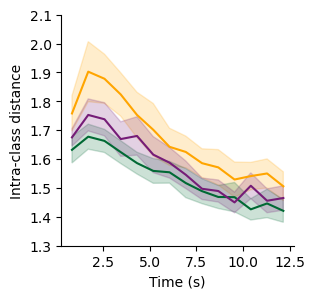

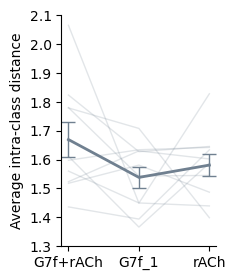

In [3]:
# compare channel
odor_selected = 0
sum_list = [3,1,4]
time_range = range(4,18)

the_color = ['#006934','#006934','#006934','orange','#751C77','orange','#036EB8']
the_color = np.array(the_color)
channel_label = ['G7f_all','G7f_1','G7f_2','G7f+rACh','rACh','G7f+r5HT','r5HT']
channel_label = np.array(channel_label)
plt.figure(figsize=(3,3))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
max_list = []
for i in sum_list:
    if i == 0:
        data = np.squeeze(data_g7f_all[:,odor_selected,:])
    elif i==1:
        data = np.squeeze(data_g7f_1[:,odor_selected,:])
    elif i==2:
        data = np.squeeze(data_g7f_2[:,odor_selected,:])
    elif i==3:
        data = np.squeeze(data_g7f_ach[:,odor_selected,:])
    elif i==4:
        data = np.squeeze(data_ach[:,odor_selected,:])
    elif i==5:
        data = np.squeeze(data_g7f_5ht[:,odor_selected,:])
    else:
        data = np.squeeze(data_5ht[:,odor_selected,:])
    xx = np.linspace(1,14,14)/(15/13)
    y = data
    the_mean = np.mean(y[:,time_range],0)
    the_std = np.std(y[:,time_range],0,ddof=1)/math.sqrt(np.size(y[:,time_range],0))
    yy_below = the_mean-the_std
    yy_above = the_mean+the_std
    plt.plot(xx, the_mean,color = the_color[i],label = channel_label[i])
    x_fill = np.concatenate((xx,xx[::-1]),axis = 0)
    y_fill = np.concatenate((yy_below,yy_above[::-1]),axis = 0)
    plt.fill(x_fill,y_fill,color = the_color[i],alpha=0.2)

    # max
    max_list.append(np.mean(y[:,time_range],1))
plt.xlabel('Time (s)')
plt.ylabel('Intra-class distance')
plt.ylim((1.3,2.1))
# plt.xlim(xmin = 0)
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + filename[:-4]+'_'+'C_'+str(sum_list[0])+'_'+str(sum_list[1])+'_'+str(sum_list[2])+'_'\
                   +'curve.pdf',bbox_inches = 'tight')
    plt.savefig(figure_save_path + '/' + filename[:-4]+'_'+'C_'+str(sum_list[0])+'_'+str(sum_list[1])+'_'+str(sum_list[2])+'_'\
                   +'curve.png',bbox_inches = 'tight')
plt.show()

# statistics
# max
save_path = figure_save_path + '/' + filename[:-4]+'_'+'C_'+str(sum_list[0])+'_'+str(sum_list[1])+'_'+str(sum_list[2])+'_'+'peak'
plot_bar(max_list,the_color[sum_list],if_save,save_path,channel_label[sum_list],'Average intra-class distance',(1.3,2.1),if_paired_test,if_p_corr)
    
    

In [4]:
# compare odor
if if_compare_odor:
    sum_list = [0,4,6]
    for ii in sum_list:
        channel_selected = ii
        if channel_selected == 0:
            data = data_g7f_all
        elif channel_selected==1:
            data = data_g7f_1
        elif channel_selected==2:
            data = data_g7f_2
        elif channel_selected==3:
            data = data_g7f_ach
        elif channel_selected==4:
            data = data_ach
        elif channel_selected==5:
            data = data_g7f_5ht
        else:
            data = data_5ht

        the_color = ['royalblue','firebrick','darkorange']
        channel_label = ['OCT','MCH','EA']
        plt.figure(figsize=(3,3))
        ax = plt.axes()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        max_list = []
        for i in range(1,4): 
            xx = np.linspace(1,14,14)/(15/13)
            y = np.squeeze(data[:,i,:])
            the_mean = np.mean(y[:,time_range],0)
            the_std = np.std(y[:,time_range],0,ddof=1)/math.sqrt(np.size(y[:,time_range],0))
            yy_below = the_mean-the_std
            yy_above = the_mean+the_std
            plt.plot(xx, the_mean,color = the_color[i-1],label = channel_label[i-1])
            x_fill = np.concatenate((xx,xx[::-1]),axis = 0)
            y_fill = np.concatenate((yy_below,yy_above[::-1]),axis = 0)
            plt.fill(x_fill,y_fill,color = the_color[i-1],alpha=0.2)

            # max
            max_list.append(np.mean(y[:,time_range],1))
        plt.xlabel('Time (s)')
        plt.ylabel('Intra-class distance')
        plt.ylim((1.3,2.1))
        # plt.xlim(xmin = 0)
        if if_save:
            mpl.rcParams['pdf.fonttype'] = 42
            mpl.rcParams['ps.fonttype'] = 42
            plt.savefig(figure_save_path + '/' + filename[:-4]+'_'+'C_'+str(ii)+'_comp_'\
                        +'curve.pdf',bbox_inches = 'tight')
            plt.savefig(figure_save_path + '/' + filename[:-4]+'_'+'C_'+str(ii)+'_comp_'\
                        +'curve.png',bbox_inches = 'tight')
        plt.show()

        # statistics
        # max
        save_path = figure_save_path + '/' + filename[:-4]+'_'+'C_'+str(ii)+'_comp_'+'peak'
        plot_bar(max_list,the_color,if_save,save_path,channel_label,'Average intra-class distance',(0,2),if_paired_test,if_p_corr)